In [1]:
import sys
sys.path.append('../')
from math import radians, sin

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import angle as model
from IPython.display import display, Markdown
import ipywidgets as widgets
from demo import *
from ipycanvas import Canvas, hold_canvas
import matplotlib.pyplot as plt

array([ 0.        ,  0.3030303 ,  0.60606061,  0.90909091,  1.21212121,
        1.51515152,  1.81818182,  2.12121212,  2.42424242,  2.72727273,
        3.03030303,  3.33333333,  3.63636364,  3.93939394,  4.24242424,
        4.54545455,  4.84848485,  5.15151515,  5.45454545,  5.75757576,
        6.06060606,  6.36363636,  6.66666667,  6.96969697,  7.27272727,
        7.57575758,  7.87878788,  8.18181818,  8.48484848,  8.78787879,
        9.09090909,  9.39393939,  9.6969697 , 10.        , 10.3030303 ,
       10.60606061, 10.90909091, 11.21212121, 11.51515152, 11.81818182,
       12.12121212, 12.42424242, 12.72727273, 13.03030303, 13.33333333,
       13.63636364, 13.93939394, 14.24242424, 14.54545455, 14.84848485,
       15.15151515, 15.45454545, 15.75757576, 16.06060606, 16.36363636,
       16.66666667, 16.96969697, 17.27272727, 17.57575758, 17.87878788,
       18.18181818, 18.48484848, 18.78787879, 19.09090909, 19.39393939,
       19.6969697 , 20.        , 20.3030303 , 20.60606061, 20.90

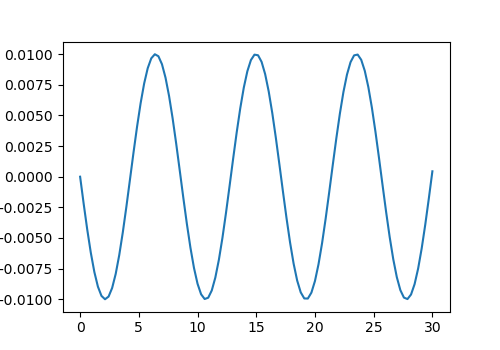

In [4]:
m = model.Angle(9, 3, 0.2)
c = model.AngleCanvas(m, L=100)
t = np.linspace(0, 30, 100)
w_0 = m.circular_frequency().real()
y = m.evaluate(t)
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(t, y)
# fig.tight_layout()
demo = Demo(m.params, m, drawable=widgets.HBox([c.canvas_box, fig.canvas]))
t

In [5]:
def pingpong(canvas, width, height):
    sx = x = 50
    ex = 150
    ping = True
    i = 0
    while True:
        x += 2 if ping else -2
        i += 5
        if ping and x >= ex:
            ping = False
        if not ping and x <= sx:
            ping = True
        with hold_canvas(canvas):
            canvas.clear()
            canvas.fill_rect(x, 50, width, height)
            canvas.fill_rects(np.array([sx, ex + width]), np.array([20, 20]), np.array([1, 1]), np.array([50, 50]))
        canvas.sleep(20)

In [6]:
import threading
t = threading.Thread(target=pingpong, args=(c.canvas, 15, 15))
#t2 = threading.Thread(target=pingpong, args=(ch, 30, 15))

In [7]:
#th = threading.Thread(target=oscilate, args=(c, m))

In [8]:
#th.start()

In [9]:
demo.show()

Output()

In [10]:
plt.plot([5.15], [m.evaluate(5.15).real()], marker='X')

In [11]:
def upd_marker(args):
    plt.plot([m.t.real()], [m.evaluate(m.t.real()).real()], marker='X')
    print(f't: {m.t}, Phi(t) = {m.evaluate(m.t.real())}')
m.observe(upd_marker)